### Sumário

- Introdução
- Transmissor
- Receptor
- Exemplo: Sinal OOK + Canal com ruído gaussiano
- Conclusão

### Introdução

Neste tópico vamos iniciar a discussão sobre alguns assuntos relacionados a comunicação digital, para começar falaremos dos blocos básicos que compoem um sistema de comunicação digital e depois passaremos por cada um deles comentando sobre aspéctos de seu funcionamento. 

Vamos relembrar o objetivo principal de um sistema de comunicação digital que é transmitir uma informação de um ponto A até um ponto B. Não importa se essa informação é um áudio, uma imagem, texto, vídeo ou outro arquivo qualquer, o que temos é uma sequência de bits que desejamos transmitir. Partindo desse stream de bits nosso sistema pode ser descrito pelos seguintes blocos:

```
|------------|        |--------------------|        |-----------------------|        |------------|
| Bit Stream | -----> | Bit-Symbol Mapping | -----> | Baseband Wave Shaping | -----> | Modulation |
|------------|        |--------------------|        |-----------------------|        |------------|
                                                                                            |
                                                                                       |---------|
                                                                                       | Channel |
                                                                                       |---------|
                                                                                            |
|------------|        |--------------------|        |------------------------|        |--------------|
| Bit Stream | <----- | Symbol-Bit Mapping | <----- | Equalization Detection | <----- | Demodulation |
|------------|        |--------------------|        |------------------------|        |--------------|

```

Sendo as etapas antes do canal chamada de processo de transmissão e após o canal de etapas de recepção.

### Transmissor

O transmissor é responsável por converter uma sequência de bits transmitida a uma taxa constante em um sinal analógico adequado para se propagar pelo canal de comunicação. Para isso, essa sequência de bits é mapeada numa sequência de símbolos onde podemos agrupar mais de um bit em um único simbolo. Cada símbolo é então mapeado numa forma de onda, normalmente um filtro é usado para limitar a banda do sinal. Por último, o bloco do modulador faz com que o sinal em banda base contendo a informação passe para portadora que possui a frequência e potência adequada para se propagar pelo meio. 

### Receptor

O receptor é responsável por recuperar a sequência de bits transmitidas. Para isso o receptor precisa detectar o sinal recebido, filtrar ruídos e corrigir distorções produzidas pelo canal de comunicação. Com signal detectado é  necessário recuperar a sequência de símbolos transmitida que é então mapeada de volta para a sequência de bits. 

### Exemplo: Sinal OOK + Canal com ruído gaussiano

Para ilustrar os blocos comentados vamos ver um exemplo de transmissão digital usando a modulação OOK (On-Off Keying). Esta modulação consiste em mapear os bits 0 e 1 para a presença e ausência do sinal, isto é:

if bit = 1
  $y(t) = p(t)$
else: 
  $y(t) = 0$ if bit = 0
  
O sinal $p(t)$ é o que chamamos de sinal em banda base ou formato de pulso e no caso da modulão OOK este sinal terá a mesma duração do tempo de bit. Para que seja transmitido adequadamente pelo canal este sinal precisará ser combinado com uma portadora para elevar a frequência do sinal em banda base, isto é feito multiplicando $p(t)$ pela portadora.

Vamos ver um exemplo de modulão OOK onde  p(t) é constante e igual a 1, $T_{bits} = 10 kbps$ e a portadora é 90 Hz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fsym = 10                    # Frequencia de symbolo
tsym = 1/10                  # Taxa de simbolo
Fs = 1000                    # Frequencia de amostragem
Ts = 1/Fs                    # Taxa de amostragem
Nbits = 10                   # Numero de bits observado no exemplo 
tfinal = Nbits*tsym          # Duraçao do exemplo
fc = 90;                     # Frequencia da portadora
t = np.arange(0, tfinal, Ts)

In [10]:
samples_sym = int(tsym/Ts)
bits = np.random.randint(0, 2, Nbits)
pulse_shape = np.ones(samples_sym)
y = np.kron(bits, pulse_shape)

In [11]:
freq = np.arange(-Fs/2, Fs/2, 0.1)
rect_spec = np.abs(np.sinc(tsym*freq))

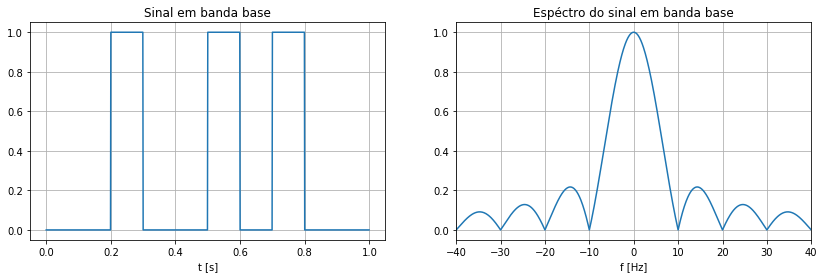

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].plot(t, y)
axs[0].set_title("Sinal em banda base")
axs[0].set_xlabel("t [s]")
axs[0].grid()
axs[1].plot(freq, rect_spec)
axs[1].set_xlim([-40, 40])
axs[1].set_title("Espéctro do sinal em banda base")
axs[1].set_xlabel("f [Hz]")
axs[1].grid()


In [14]:
y_trans = y*np.sin(2*np.pi*fc*t)

In [15]:
y_trans_spec = np.zeros(freq.shape)
y_trans_spec[np.isclose(fc, freq)] = 1
y_trans_spec[np.isclose(-fc, freq)] = 1
y_trans_spec = np.convolve(rect_spec, y_trans_spec, 'same')

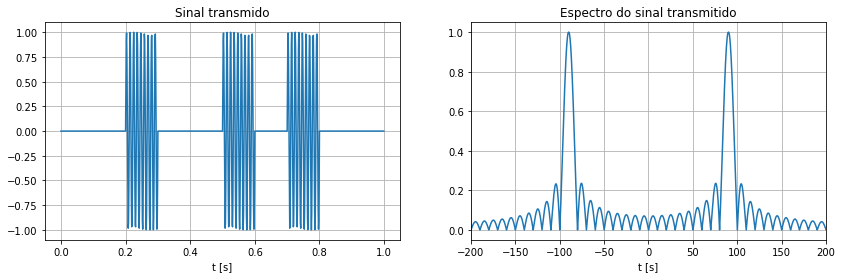

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].plot(t, y_trans)
axs[0].set_title("Sinal transmido")
axs[0].set_xlabel("t [s]")
axs[0].grid()
axs[1].plot(freq, y_trans_spec)
axs[1].set_xlim([-200, 200])
axs[1].set_title("Espectro do sinal transmitido")
axs[1].set_xlabel("t [s]")
axs[1].grid()


Vemos pelo espectro final do sinal que este corresponde a espectro do sinal em banda base deslocado para o centro da portadora, outro problema é a energia contina nesse espéctro se espalha muito além do entorno dessa frequência. Na prática o sinal transmitido não pode ocupar indefinidamente a banda do canal.

Para recepção do sinal, precisamos primeiro recuperar o sinal de volta na banda base e em seguinda amostrar o sinal na taxa de bits transmitidas, caso o sinal fique acima de um limiar consideramos que o bit 1 foi transmitidos, caso contrário consideramos que foi o bit 0.

Nós próximos tópicos veremos com mais detalhes as etapas desse e de outros processos durante a transmissão e recepção do sinal, iremos determinar como essa banda se relaciona com a taxa de bits e de símbolo, qual relação dos simbolos com a SNR do canal entre outras coisas.

### Conclusão

Neste tópico discutimos:

- Os blocos básicos de um sistema de comunicação digital
- Uma breve introdução as etapas em cada bloco
- Um exemplo de transmissão usando modulação OOK